In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")

In [3]:
# Load the dataset 
df = pd.read_csv('athlete_events.csv')

# Check the first few rows of the dataset
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
# Clean the data
df.dropna(subset=['Year', 'Sport', 'Medal'], inplace=True)

# Check for any null values
df.isnull().sum()

# Convert 'Year' to datetime
df['Year'] = pd.to_datetime(df['Year'], format='%Y').dt.year

# Create a column for 'Age' of athletes
df['Age'].dropna(inplace=True)

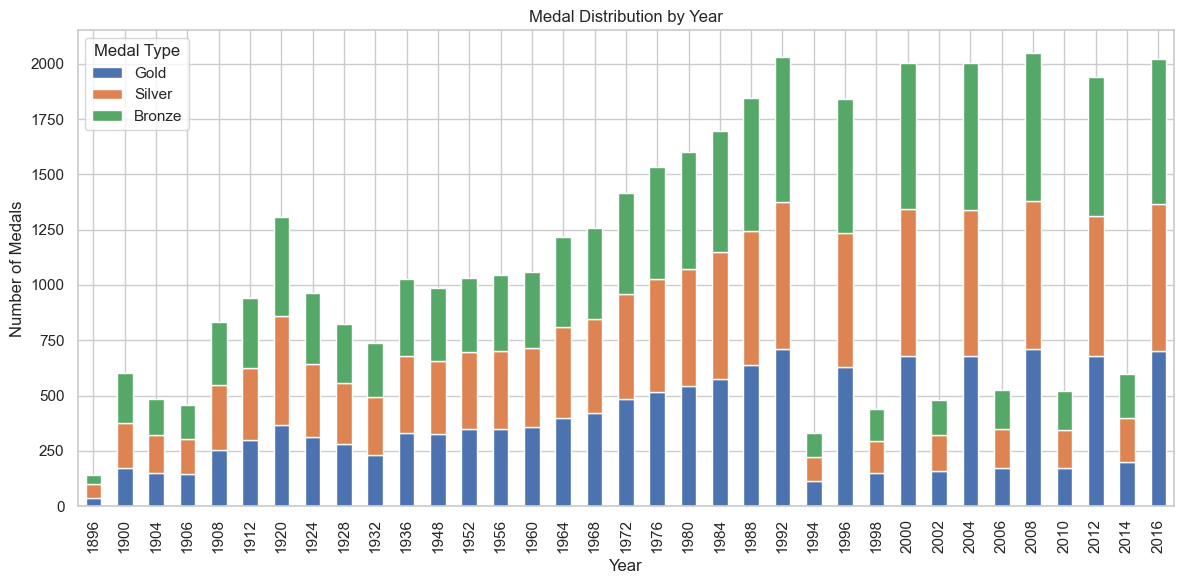

In [5]:
# Medal distribution by Year

medals_per_year = df.groupby('Year')['Medal'].value_counts().unstack().fillna(0)
medals_per_year.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Medal Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.legend(title='Medal Type', labels=['Gold', 'Silver', 'Bronze'])
plt.tight_layout()
plt.show()

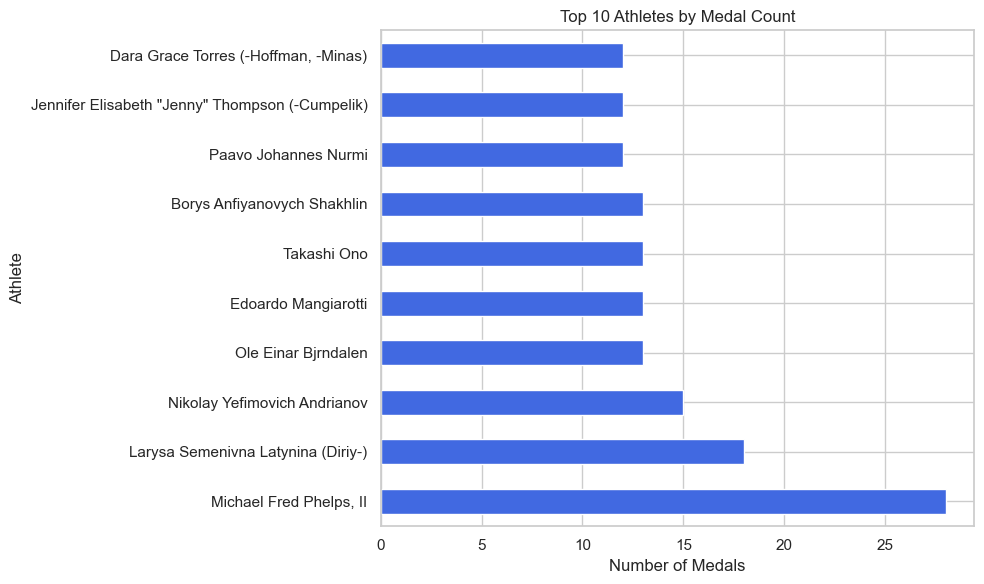

In [6]:
# Top athletes by Medal Count

athletes_medals = df[df['Medal'].notnull()]['Name'].value_counts().head(10)
athletes_medals.plot(kind='barh', color='royalblue', figsize=(10, 6))
plt.title('Top 10 Athletes by Medal Count')
plt.xlabel('Number of Medals')
plt.ylabel('Athlete')
plt.tight_layout()
plt.show()

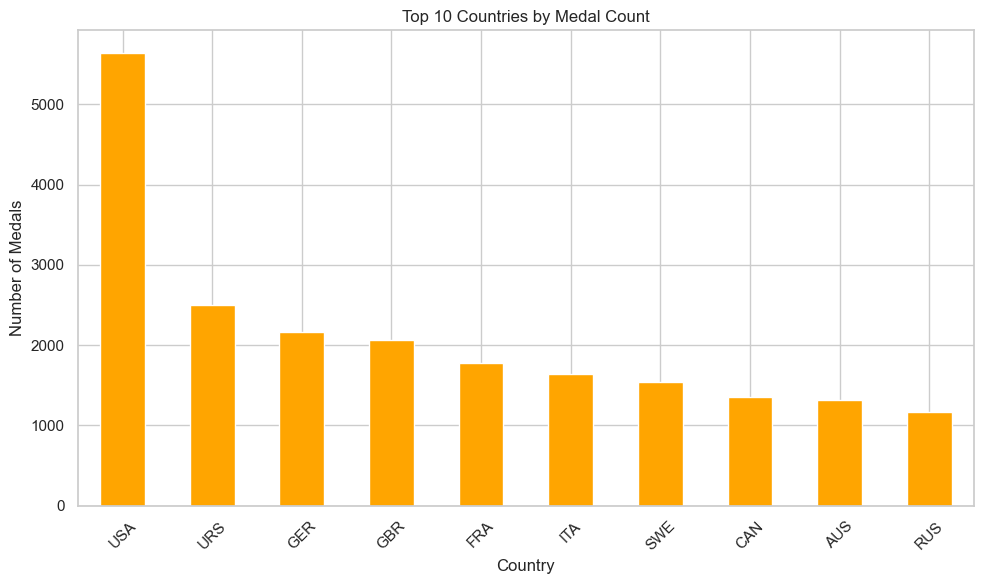

In [7]:
# Medal distribution by country

country_medals = df[df['Medal'].notnull()]['NOC'].value_counts().head(10)
country_medals.plot(kind='bar', color='orange', figsize=(10, 6))
plt.title('Top 10 Countries by Medal Count')
plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

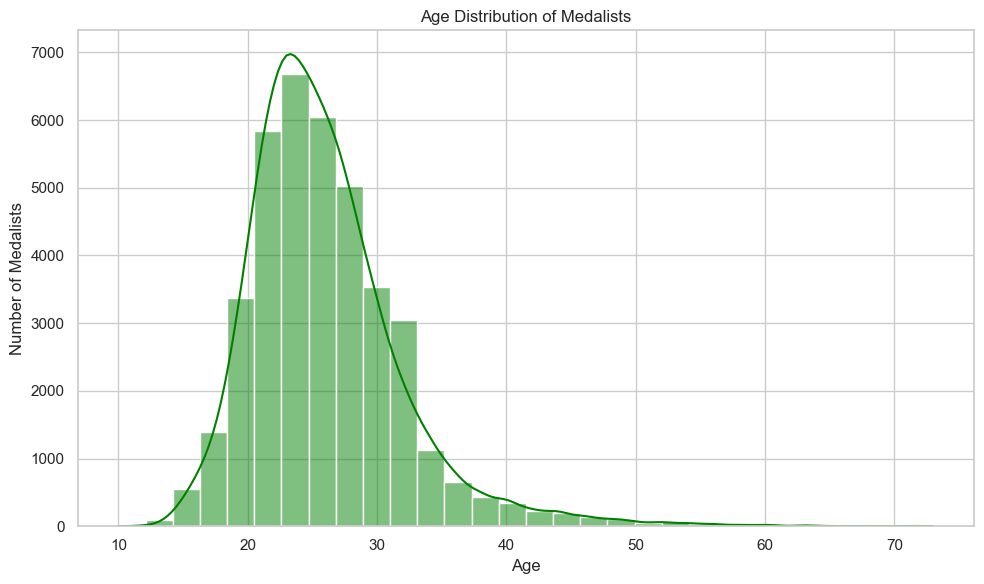

In [8]:
# Age distribution of Medalists

df['Age'].dropna(inplace=True)
medalists = df[df['Medal'].notnull()]
plt.figure(figsize=(10, 6))
sns.histplot(medalists['Age'], bins=30, kde=True, color='green')
plt.title('Age Distribution of Medalists')
plt.xlabel('Age')
plt.ylabel('Number of Medalists')
plt.tight_layout()
plt.show()

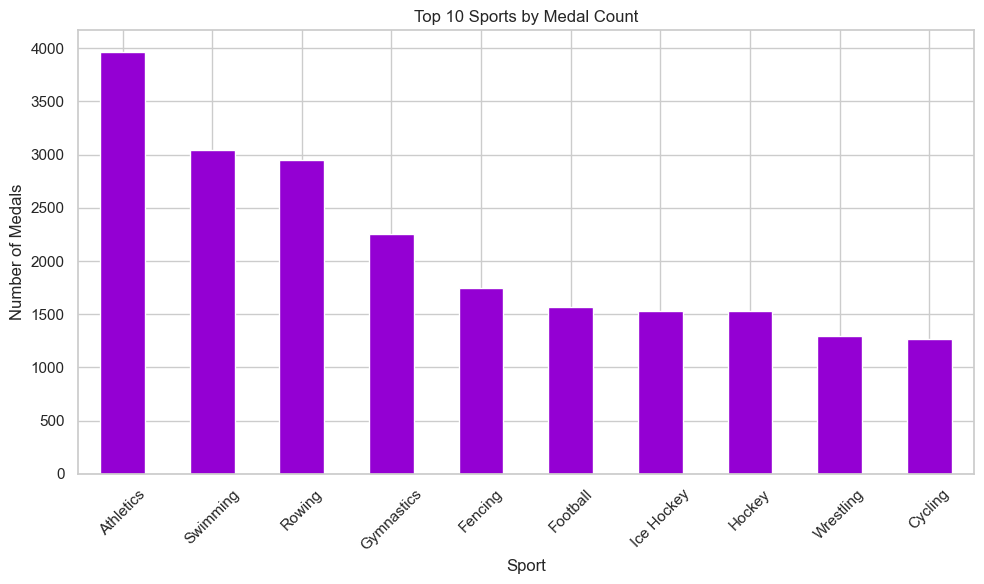

In [9]:
# Top Sports by Medal Count

top_sports = df[df['Medal'].notnull()]['Sport'].value_counts().head(10)
top_sports.plot(kind='bar', color='darkviolet', figsize=(10, 6))
plt.title('Top 10 Sports by Medal Count')
plt.xlabel('Sport')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

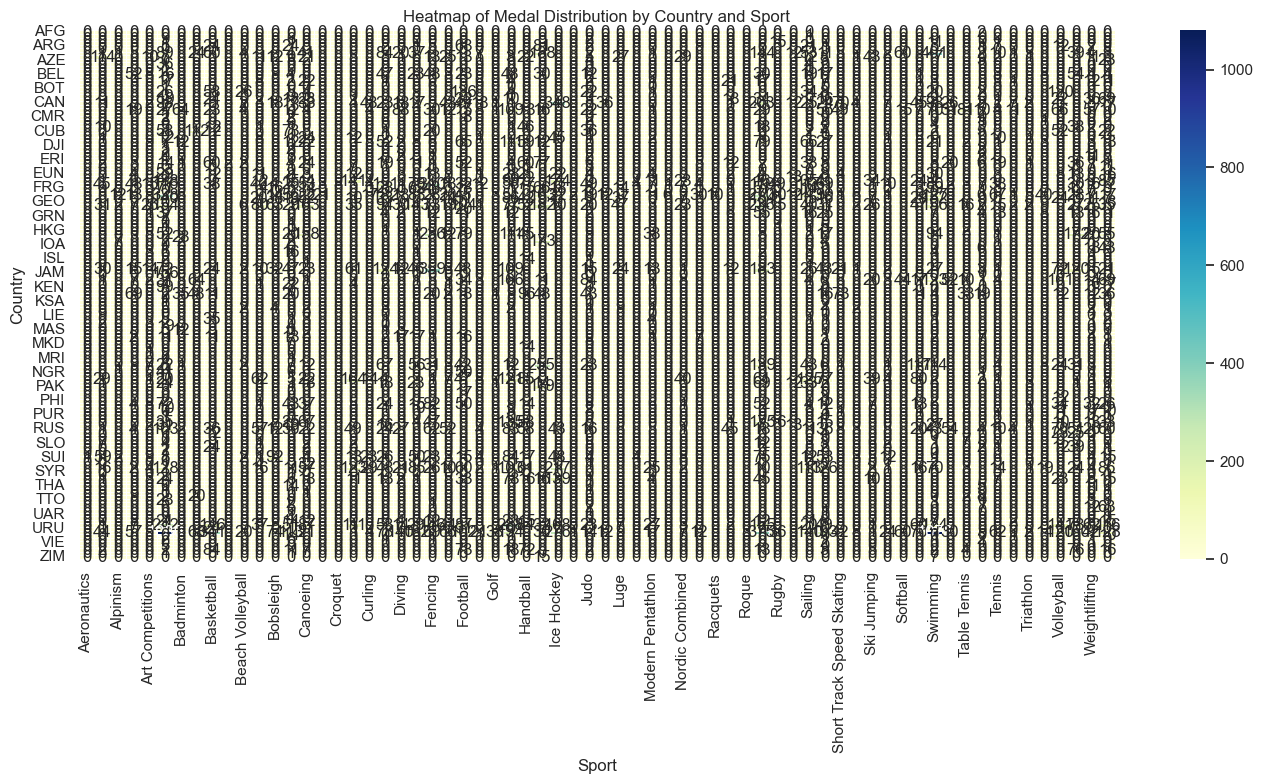

In [10]:
# Heatmap of Medal Distribution by Country & Sport

medal_matrix = df[df['Medal'].notnull()].pivot_table(index='NOC', columns='Sport', values='Medal', aggfunc='count').fillna(0)
plt.figure(figsize=(14, 8))
sns.heatmap(medal_matrix, cmap='YlGnBu', annot=True, fmt='g', linewidths=0.5)
plt.title('Heatmap of Medal Distribution by Country and Sport')
plt.xlabel('Sport')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

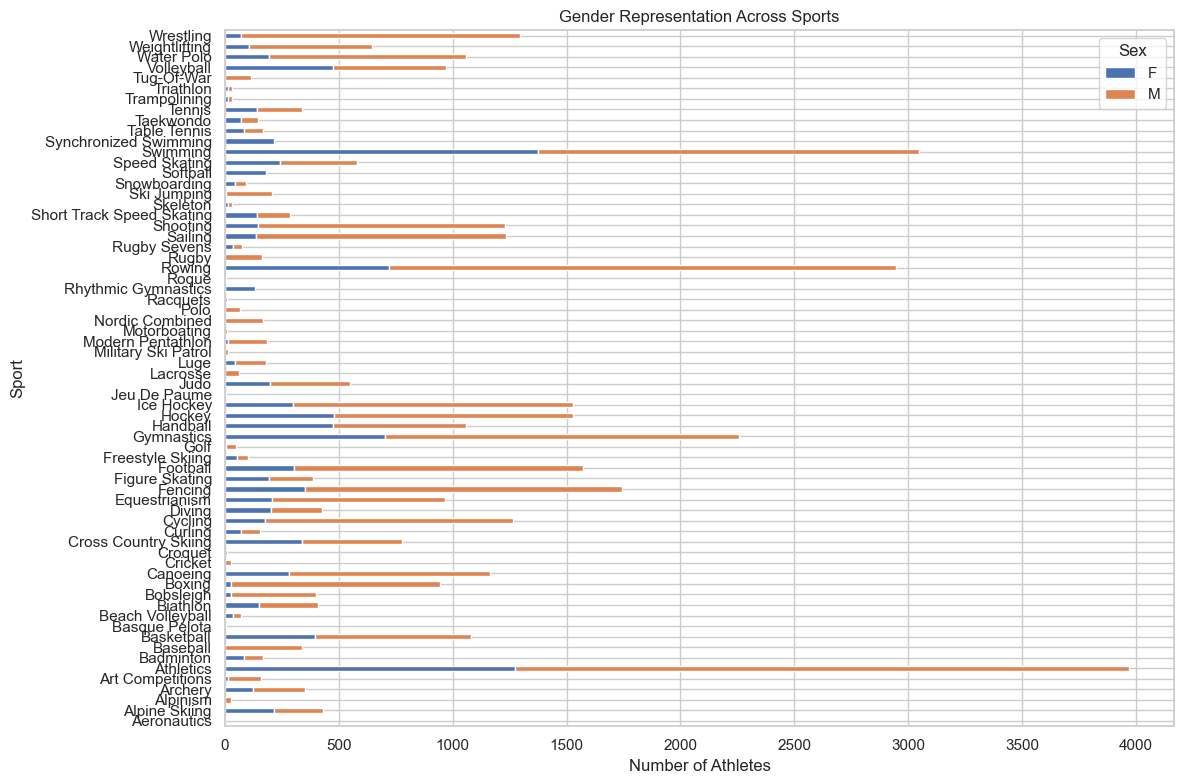

In [11]:
# Gender Representation in Sports

gender_sport = df.groupby(['Sport', 'Sex']).size().unstack().fillna(0)
gender_sport.plot(kind='barh', stacked=True, figsize=(12, 8))
plt.title('Gender Representation Across Sports')
plt.xlabel('Number of Athletes')
plt.ylabel('Sport')
plt.tight_layout()
plt.show()

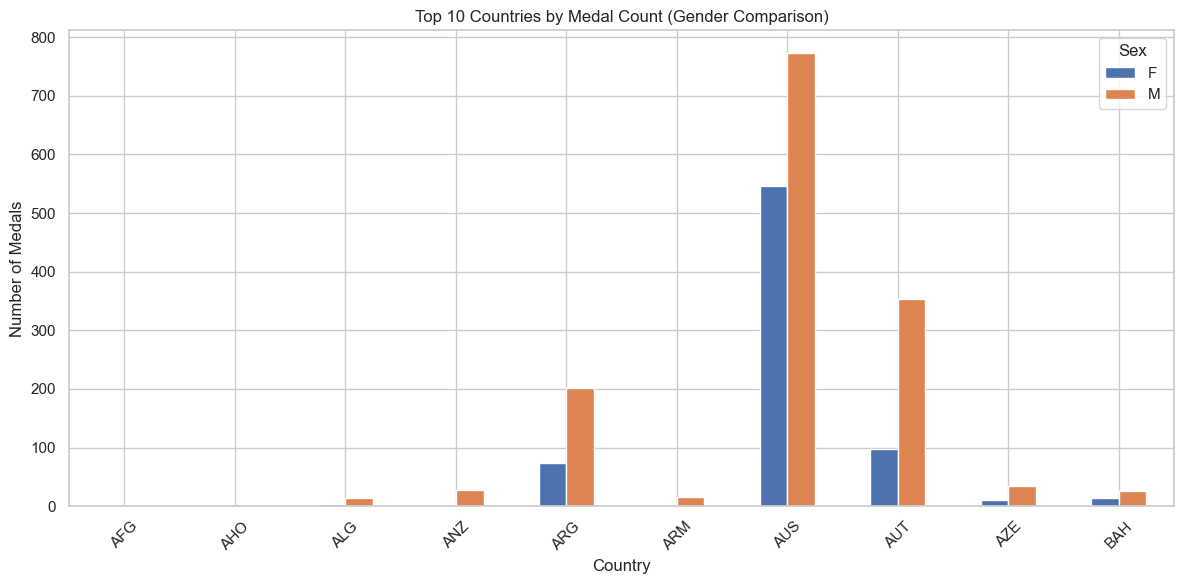

In [12]:
# Comparison of Medal Counts by Country & Gender

gender_country_medals = df[df['Medal'].notnull()].groupby(['NOC', 'Sex'])['Medal'].count().unstack().fillna(0)
gender_country_medals.head(10).plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 Countries by Medal Count (Gender Comparison)')
plt.xlabel('Country')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()